In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import os

# hide warnings
import warnings

Load the dataset

In [43]:
train_data = pd.read_csv('train_house.csv')
final_data = pd.read_csv('test_house.csv')

In [44]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
train_data.shape

(1460, 81)

In [46]:
y = train_data['SalePrice']

In [47]:
X =train_data.drop(columns = ['SalePrice'])

In [48]:
X.shape

(1460, 80)

Exploratory Data Analysis

In [49]:
X.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [50]:

X.drop(['Alley'],axis=1,inplace=True)
X.drop(['PoolQC'],axis=1,inplace=True)
X.drop(['Fence'],axis=1,inplace=True)
X.drop(['MiscFeature'],axis=1,inplace=True)

In [51]:
X['BsmtQual'].fillna(X['BsmtQual'].mode()[0], inplace = True)
X['BsmtCond'].fillna(X['BsmtCond'].mode()[0], inplace = True)
X['BsmtExposure'].fillna(X['BsmtExposure'].mode()[0], inplace = True)
X['BsmtFinType1'].fillna(X['BsmtFinType1'].mode()[0], inplace = True)
X['BsmtFinType2'].fillna(X['BsmtFinType2'].mode()[0], inplace = True)
X['MasVnrType'].fillna(X['MasVnrType'].mode()[0], inplace = True)
X['FireplaceQu'].fillna(X['FireplaceQu'].mode()[0], inplace = True)
X['GarageType'].fillna(X['GarageType'].mode()[0], inplace = True)
X['LotFrontage'].fillna(X['LotFrontage'].mean(), inplace = True)
X['MasVnrArea'].fillna(X['MasVnrArea'].mean(), inplace = True)
X['GarageYrBlt'].fillna(X['GarageYrBlt'].mean(), inplace = True)
X['GarageFinish'].fillna(X['GarageFinish'].mode()[0], inplace = True)
X['GarageQual'].fillna(X['GarageQual'].mode()[0], inplace = True)
X['GarageCond'].fillna(X['GarageCond'].mode()[0], inplace = True)
X['Electrical'].fillna(X['Electrical'].mode()[0], inplace = True)



In [52]:
X.shape

(1460, 76)

In [53]:
X.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [54]:
numerical_feature = [feature for feature in X.columns if X[feature].dtypes != 'O']

In [55]:
numerical_feature

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [56]:
categorical_feature = [feature for feature in X.columns if feature not in numerical_feature]

In [57]:
categorical_feature

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [58]:
X.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [59]:
X.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

Dummy Variables

In [60]:
label_encoder = preprocessing.LabelEncoder()

In [61]:
X['MSZoning'] = label_encoder.fit_transform(X['MSZoning'])
X['Street'] = label_encoder.fit_transform(X['Street'])
X['LotShape'] = label_encoder.fit_transform(X['LotShape'])
X['LandContour'] = label_encoder.fit_transform(X['LandContour'])
X['Utilities'] = label_encoder.fit_transform(X['Utilities'])
X['LotConfig'] = label_encoder.fit_transform(X['LotConfig'])
X['LandSlope'] = label_encoder.fit_transform(X['LandSlope'])
X['Neighborhood'] = label_encoder.fit_transform(X['Neighborhood'])
X['Condition1'] = label_encoder.fit_transform(X['Condition1'])
X['Condition2'] = label_encoder.fit_transform(X['Condition2'])
X['BldgType'] = label_encoder.fit_transform(X['BldgType'])
X['HouseStyle'] = label_encoder.fit_transform(X['HouseStyle'])
X['RoofStyle'] = label_encoder.fit_transform(X['RoofStyle'])
X['RoofMatl'] = label_encoder.fit_transform(X['RoofMatl'])
X['Exterior1st'] = label_encoder.fit_transform(X['Exterior1st'])
X['Exterior2nd'] = label_encoder.fit_transform(X['Exterior2nd'])
X['MasVnrType'] = label_encoder.fit_transform(X['MasVnrType'])
X['ExterQual'] = label_encoder.fit_transform(X['ExterQual'])
X['ExterCond'] = label_encoder.fit_transform(X['ExterCond'])
X['Foundation'] = label_encoder.fit_transform(X['Foundation'])
X['BsmtQual'] = label_encoder.fit_transform(X['BsmtQual'])
X['BsmtCond'] = label_encoder.fit_transform(X['BsmtCond'])
X['BsmtExposure'] = label_encoder.fit_transform(X['BsmtExposure'])
X['BsmtFinType1'] = label_encoder.fit_transform(X['BsmtFinType1'])
X['BsmtFinType2'] = label_encoder.fit_transform(X['BsmtFinType2'])
X['Heating'] = label_encoder.fit_transform(X['Heating'])
X['HeatingQC'] = label_encoder.fit_transform(X['HeatingQC'])
X['CentralAir'] = label_encoder.fit_transform(X['CentralAir'])
X['Electrical'] = label_encoder.fit_transform(X['Electrical'])
X['KitchenQual'] = label_encoder.fit_transform(X['KitchenQual'])
X['Functional'] = label_encoder.fit_transform(X['Functional'])
X['FireplaceQu'] = label_encoder.fit_transform(X['FireplaceQu'])
X['GarageType'] = label_encoder.fit_transform(X['GarageType'])
X['GarageFinish'] = label_encoder.fit_transform(X['GarageFinish'])
X['GarageQual'] = label_encoder.fit_transform(X['GarageQual'])
X['GarageCond'] = label_encoder.fit_transform(X['GarageCond'])
X['PavedDrive'] = label_encoder.fit_transform(X['PavedDrive'])
X['SaleType'] = label_encoder.fit_transform(X['SaleType'])
X['SaleCondition'] = label_encoder.fit_transform(X['SaleCondition'])


In [62]:
X_dummy=pd.get_dummies(X,drop_first=True)
X_dummy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4
1,2,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4
2,3,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4
3,4,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0
4,5,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4


In [63]:
X_dummy.shape


(1460, 76)

Test Train Split

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

RIDGE REGRESSION

In [65]:
params = {'alpha': [0.01, 0.1, 0.2,0.4, 0.5, 0.8, 0.9, 1.0, 5.0, 8.0, 9.0, 10.0, 20, 50 ]}
len(params['alpha'])

14

In [66]:
ridge = Ridge()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        #return_train_score=True,
                        verbose = 1)  
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 0.2, 0.4, 0.5, 0.8, 0.9, 1.0, 5.0,
                                   8.0, 9.0, 10.0, 20, 50]},
             scoring='neg_mean_absolute_error', verbose=1)

In [67]:
model_cv.best_params_

{'alpha': 50}

In [68]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013210,0.022832,0.002402,0.001883,0.01,{'alpha': 0.01},-20530.321934,-23645.921980,-23176.934048,-19878.789889,-19675.941153,-21381.581801,1687.765567,14
1,0.005700,0.003248,0.002300,0.000480,0.1,{'alpha': 0.1},-20530.439995,-23643.028354,-23169.536633,-19872.432892,-19667.087145,-21376.505004,1688.328099,13
2,0.003119,0.000277,0.001727,0.000399,0.2,{'alpha': 0.2},-20530.163037,-23640.926920,-23161.736535,-19866.305955,-19658.421285,-21371.510746,1688.984374,12
3,0.003690,0.000643,0.001774,0.000932,0.4,{'alpha': 0.4},-20528.077860,-23638.832484,-23147.026388,-19855.999112,-19642.890549,-21362.565279,1690.507964,11
4,0.004266,0.001307,0.002885,0.001490,0.5,{'alpha': 0.5},-20526.765750,-23638.405810,-23139.980553,-19851.496966,-19635.825311,-21358.494878,1691.277124,10
5,0.004414,0.000760,0.002142,0.000220,0.8,{'alpha': 0.8},-20521.497899,-23638.244418,-23119.640179,-19839.521167,-19616.832538,-21347.147240,1693.486326,9
6,0.003372,0.001326,0.001519,0.000846,0.9,{'alpha': 0.9},-20519.449806,-23638.362366,-23113.057863,-19835.867925,-19611.110137,-21343.569619,1694.161511,8
7,0.003222,0.001699,0.002812,0.002802,1.0,{'alpha': 1.0},-20517.302070,-23638.506241,-23106.553060,-19832.328426,-19605.641722,-21340.066304,1694.800562,7
8,0.003035,0.000455,0.001617,0.000201,5.0,{'alpha': 5.0},-20436.183299,-23622.863166,-22882.098680,-19710.966183,-19473.479547,-21225.118175,1701.650835,6
9,0.002592,0.000187,0.001844,0.000266,8.0,{'alpha': 8.0},-20379.590046,-23592.772925,-22746.264079,-19626.431081,-19407.735600,-21150.558746,1700.910109,5


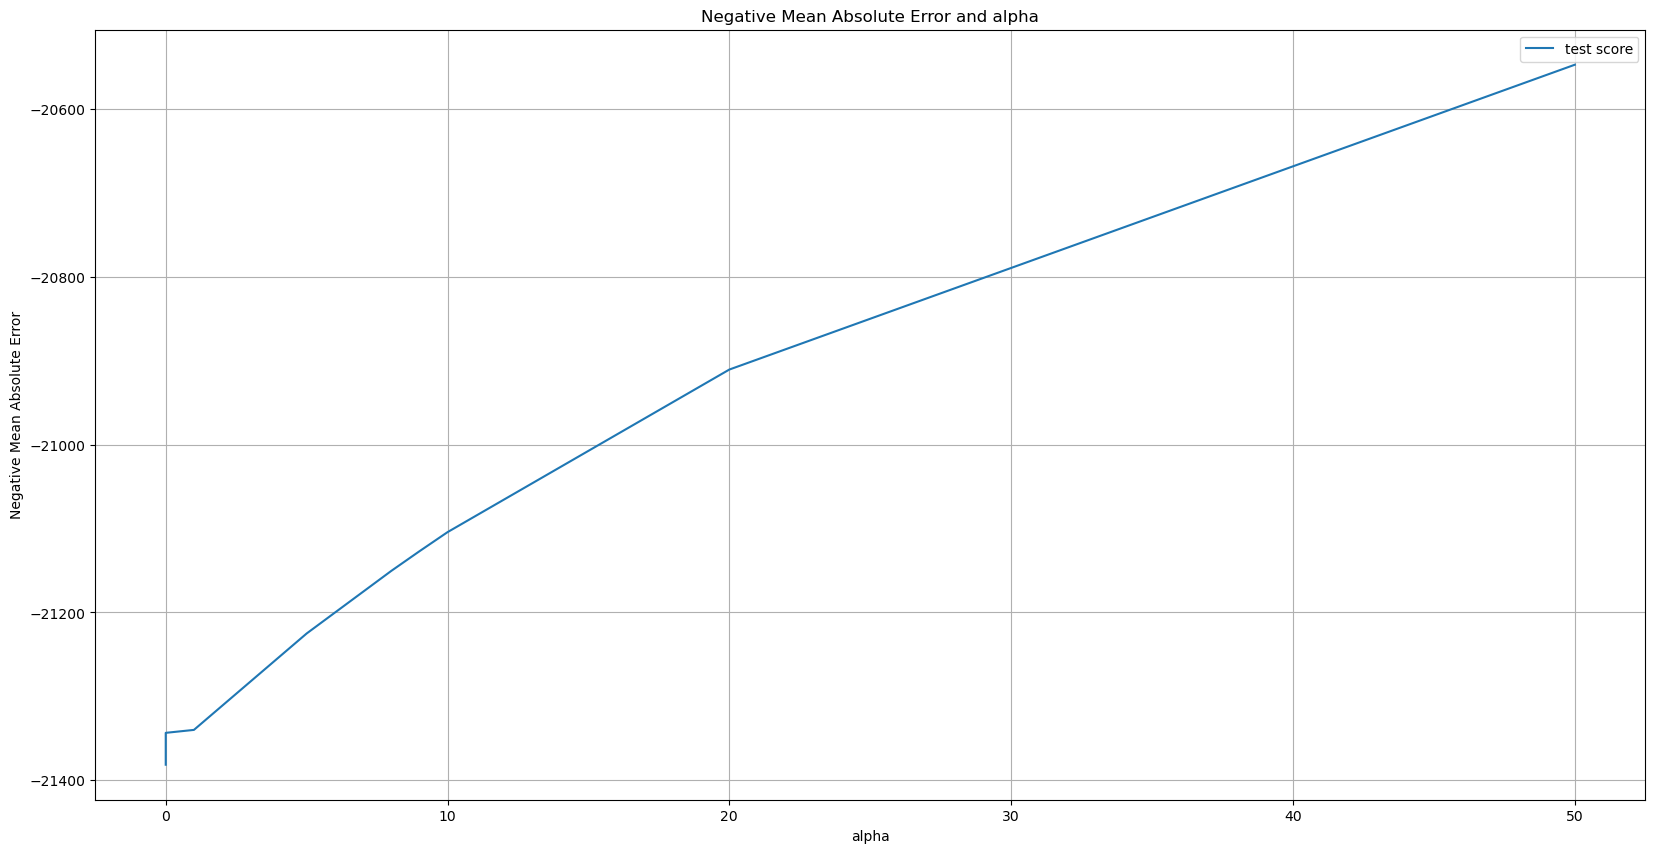

In [69]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int')

# plotting
plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['test score'], loc='upper right')
plt.show()

In [70]:
# looking at the above it seems the right Alpha to take is at 20
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.40747921e-01, -1.53692550e+02, -1.55736907e+03, -1.25596218e+02,
        2.78221919e-01,  3.97266742e+03, -9.20542118e+02,  5.60325978e+03,
       -1.57451510e+03,  2.61109695e+02,  7.91444919e+03,  4.24245576e+02,
       -2.66021233e+02, -7.47079009e+03, -2.31346682e+03, -1.92017968e+03,
        1.18038021e+04,  4.05977510e+03,  1.61088294e+02,  9.58101242e+01,
        1.42911306e+03,  5.73635964e+03,  2.04189460e+02, -7.58539375e+02,
        1.70250313e+03,  2.91202422e+01, -5.84369202e+03,  3.30268168e+02,
        1.52160098e+03, -1.03593029e+04,  1.89236959e+03, -4.11124528e+03,
       -1.50125242e+03,  6.24299721e-01,  1.03515932e+03,  6.32845429e+00,
       -1.06713532e+00,  5.88561887e+00,  9.72980539e+02, -5.89405785e+02,
       -3.56332855e+02,  3.71504812e+02,  1.82882282e+01,  2.34821353e+01,
       -1.11073450e+01,  3.06630183e+01,  9.28590445e+03,  1.13569622e+03,
        3.30289909e+03, -7.53095665e+02, -1.43676462e+03, -4.85794140e+03,
       -9.14528373e+03,  

In [71]:
imp_ridge = pd.DataFrame({
    "Varname": X_train.columns,
    "Coefficient": ridge.coef_})
imp_ridge.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
16,OverallQual,11803.802133
60,GarageCars,9466.947170
46,BsmtFullBath,9285.904454
10,LandSlope,7914.449187
55,Fireplaces,6786.745607
21,RoofMatl,5736.359635
7,LandContour,5603.259780
17,OverallCond,4059.775097
5,Street,3972.667424
54,Functional,3703.419031


Model performance evaluation

In [72]:
y_pred = ridge.predict(X_test)

In [73]:
y_pred

array([106349.13857943, 200186.43726743, 175552.4336384 , 220815.37955122,
       115406.88098313, 250305.70315821, 218051.82552816, 295072.33379482,
        93028.04931086, 172849.55521775, 202622.21869201, 204953.84637146,
       184819.96122939, 255143.72967438,  94964.32432573, 119541.1314766 ,
       182485.16945068,  93522.0276205 , 125857.29788229, 138306.00160315,
       152728.72618388,  95769.02075886, 127251.34921898, 119051.15178659,
       197736.63388016, 161775.76262309,  29710.59657641,  85644.14306406,
       203459.25964939, 149819.46282285, 147960.3102013 , 196080.36403919,
       229543.58944508,  83564.72382761, 112967.28290297,  67402.83348266,
       126200.10143828,  78741.38258497, 157838.97683176, 115733.97418373,
       318648.80105097, 221897.43772951, 126344.53041107,  82420.17511988,
       134707.07700304,  58434.96026272, 262650.46821618, 123136.80044967,
       139802.10583082,  97657.57937011, 218589.4031727 ,  83521.84777231,
       319898.82678075, 2

In [74]:
from sklearn import metrics 

In [75]:
metrics.mean_absolute_percentage_error(y_test,y_pred)

0.12078876858215154

In [76]:
metrics.r2_score(y_test,y_pred)

0.8418530429828788

Prediction on Test data

In [77]:

final_data.drop(['Alley'],axis=1,inplace=True)
final_data.drop(['PoolQC'],axis=1,inplace=True)

final_data.drop(['Fence'],axis=1,inplace=True)

final_data.drop(['MiscFeature'],axis=1,inplace=True)


final_data['BsmtQual'].fillna(final_data['BsmtQual'].mode()[0], inplace = True)

final_data['BsmtCond'].fillna(final_data['BsmtCond'].mode()[0], inplace = True)

final_data['BsmtExposure'].fillna(final_data['BsmtExposure'].mode()[0], inplace = True)

final_data['BsmtFinType1'].fillna(final_data['BsmtFinType1'].mode()[0], inplace = True)

final_data['BsmtFinType2'].fillna(final_data['BsmtFinType2'].mode()[0], inplace = True)
final_data['MasVnrType'].fillna(final_data['MasVnrType'].mode()[0], inplace = True)

final_data['FireplaceQu'].fillna(final_data['FireplaceQu'].mode()[0], inplace = True)
final_data['GarageType'].fillna(final_data['GarageType'].mode()[0], inplace = True)

final_data['LotFrontage'].fillna(final_data['LotFrontage'].mean(), inplace = True)
final_data['MasVnrArea'].fillna(final_data['MasVnrArea'].mean(), inplace = True)
final_data['GarageYrBlt'].fillna(final_data['GarageYrBlt'].mean(), inplace = True)
final_data['GarageFinish'].fillna(final_data['GarageFinish'].mode()[0], inplace = True)
final_data['GarageQual'].fillna(final_data['GarageQual'].mode()[0], inplace = True)
final_data['GarageCond'].fillna(final_data['GarageCond'].mode()[0], inplace = True)
final_data['Electrical'].fillna(final_data['Electrical'].mode()[0], inplace = True)










In [78]:
final_data['MSZoning'].fillna(final_data['MSZoning'].mode()[0], inplace = True)

final_data['Utilities'].fillna(final_data['Utilities'].mode()[0], inplace = True)

final_data['Exterior1st'].fillna(final_data['Exterior1st'].mode()[0], inplace = True)

final_data['Exterior2nd'].fillna(final_data['Exterior2nd'].mode()[0], inplace = True)

final_data['BsmtFinSF1'].fillna(final_data['BsmtFinSF1'].mode()[0], inplace = True)

final_data['GarageArea'].fillna(final_data['GarageArea'].mode()[0], inplace = True)

final_data['GarageCars'].fillna(final_data['GarageCars'].mode()[0], inplace = True)

final_data['BsmtFinSF2'].fillna(final_data['BsmtFinSF2'].mode()[0], inplace = True)
final_data['BsmtUnfSF'].fillna(final_data['BsmtUnfSF'].mode()[0], inplace = True)

final_data['TotalBsmtSF'].fillna(final_data['TotalBsmtSF'].mode()[0], inplace = True)

final_data['BsmtFullBath'].fillna(final_data['BsmtFullBath'].mode()[0], inplace = True)

final_data['BsmtHalfBath'].fillna(final_data['BsmtHalfBath'].mode()[0], inplace = True)

In [79]:
final_data.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [80]:
Xfinal_dummy=pd.get_dummies(final_data,drop_first=True)
Xfinal_dummy.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1462,20,81.0,14267

In [81]:
Xfinal_dummy.shape

(1459, 221)

In [82]:
final_data['MSZoning'] = label_encoder.fit_transform(final_data['MSZoning'])
final_data['Street'] = label_encoder.fit_transform(final_data['Street'])
final_data['LotShape'] = label_encoder.fit_transform(final_data['LotShape'])
final_data['LandContour'] = label_encoder.fit_transform(final_data['LandContour'])
final_data['Utilities'] = label_encoder.fit_transform(final_data['Utilities'])
final_data['LotConfig'] = label_encoder.fit_transform(final_data['LotConfig'])
final_data['LandSlope'] = label_encoder.fit_transform(final_data['LandSlope'])
final_data['Neighborhood'] = label_encoder.fit_transform(final_data['Neighborhood'])
final_data['Condition1'] = label_encoder.fit_transform(final_data['Condition1'])
final_data['Condition2'] = label_encoder.fit_transform(final_data['Condition2'])
final_data['BldgType'] = label_encoder.fit_transform(final_data['BldgType'])
final_data['HouseStyle'] = label_encoder.fit_transform(final_data['HouseStyle'])
final_data['RoofStyle'] = label_encoder.fit_transform(final_data['RoofStyle'])
final_data['RoofMatl'] = label_encoder.fit_transform(final_data['RoofMatl'])
final_data['Exterior1st'] = label_encoder.fit_transform(final_data['Exterior1st'])


final_data['Exterior2nd'] = label_encoder.fit_transform(final_data['Exterior2nd'])
final_data['MasVnrType'] = label_encoder.fit_transform(final_data['MasVnrType'])
final_data['ExterQual'] = label_encoder.fit_transform(final_data['ExterQual'])
final_data['ExterCond'] = label_encoder.fit_transform(final_data['ExterCond'])
final_data['Foundation'] = label_encoder.fit_transform(final_data['Foundation'])
final_data['BsmtQual'] = label_encoder.fit_transform(final_data['BsmtQual'])
final_data['BsmtCond'] = label_encoder.fit_transform(final_data['BsmtCond'])
final_data['BsmtExposure'] = label_encoder.fit_transform(final_data['BsmtExposure'])
final_data['BsmtFinType1'] = label_encoder.fit_transform(final_data['BsmtFinType1'])
final_data['BsmtFinType2'] = label_encoder.fit_transform(final_data['BsmtFinType2'])
final_data['Heating'] = label_encoder.fit_transform(final_data['Heating'])
final_data['HeatingQC'] = label_encoder.fit_transform(final_data['HeatingQC'])
final_data['CentralAir'] = label_encoder.fit_transform(final_data['CentralAir'])

final_data['Electrical'] = label_encoder.fit_transform(final_data['Electrical'])
final_data['KitchenQual'] = label_encoder.fit_transform(final_data['KitchenQual'])
final_data['Functional'] = label_encoder.fit_transform(final_data['Functional'])
final_data['FireplaceQu'] = label_encoder.fit_transform(final_data['FireplaceQu'])
final_data['GarageType'] = label_encoder.fit_transform(final_data['GarageType'])
final_data['GarageFinish'] = label_encoder.fit_transform(final_data['GarageFinish'])
final_data['GarageQual'] = label_encoder.fit_transform(final_data['GarageQual'])
final_data['GarageCond'] = label_encoder.fit_transform(final_data['GarageCond'])
final_data['PavedDrive'] = label_encoder.fit_transform(final_data['PavedDrive'])
final_data['SaleType'] = label_encoder.fit_transform(final_data['SaleType'])
final_data['SaleCondition'] = label_encoder.fit_transform(final_data['SaleCondition'])


In [83]:
y_pred_final = ridge.predict(final_data)

In [84]:
y_pred_final

array([ 91338.93913891, 143755.17687281, 157873.0901151 , ...,
       134164.37788521, 102925.91971269, 236775.94048135])

In [87]:
# Create a DataFrame for the submission
submission = pd.DataFrame()
submission['Id'] = final_data['Id']
submission['SalePrice'] = y_pred_final 
# Save the submission DataFrame to a CSV file
submission.to_csv('result_house.csv', index=False)
submission.head()

,Id,SalePrice
0,1461,91338.939139
1,1462,143755.176873
2,1463,157873.090115
3,1464,176778.064110
4,1465,174956.259353
